In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

#matplotlib inline 

In [24]:
url = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/bonus%20content/effective%20data%20visualization/winequality-red.csv'
red_wine = pd.read_csv(url, sep=';')

url = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/bonus%20content/effective%20data%20visualization/winequality-white.csv'
white_wine = pd.read_csv(url, sep=';')

#store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

#bucket wine quality scores qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                         if value <= 5 else 'medium'
                                                          if value <= 7 else 'high'
                                                          )
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                          categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
                                                         if value <= 5 else 'medium'
                                                         if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories= ['low', 'medium', 'high'])
#merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

 #re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True) 


In [25]:
#understand dataset and features
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [27]:
#descriptive Statistics
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'Wine Wine Statistics'])

Red Wine Statistics                       ... Wine Wine Statistics         
           residual sugar total sulfur dioxide  ...     volatile acidity  quality
count             1599.00              1599.00  ...              4898.00  4898.00
mean                 2.54                46.47  ...                 0.28     5.88
std                  1.41                32.90  ...                 0.10     0.89
min                  0.90                 6.00  ...                 0.08     3.00
25%                  1.90                22.00  ...                 0.21     5.00
50%                  2.20                38.00  ...                 0.26     6.00
75%                  2.60                62.00  ...                 0.32     6.00
max                 15.50               289.00  ...                 1.10     9.00

[8 rows x 12 columns]

In [29]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis =1, keys=['Low Quality Wine', 'Medium Quality wine', 'High Quality Wine'])


Low Quality Wine                   ... High Quality Wine        
               alcohol volatile acidity  ...                pH quality
count          2384.00          2384.00  ...            198.00  198.00
mean              9.87             0.40  ...              3.23    8.03
std               0.84             0.19  ...              0.16    0.16
min               8.00             0.10  ...              2.88    8.00
25%               9.30             0.26  ...              3.13    8.00
50%               9.60             0.34  ...              3.23    8.00
75%              10.40             0.50  ...              3.33    8.00
max              14.90             1.58  ...              3.72    9.00

[8 rows x 12 columns]

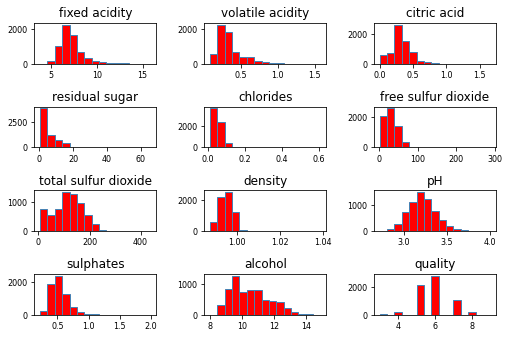

In [36]:
#Univariate Analysis
wines.hist(bins=15, color='red', edgecolor='steelblue', linewidth=1.0, 
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))          

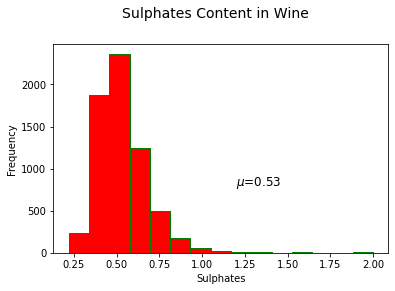

In [37]:
#Continous, numeric attribute in 1-D
fig = plt.figure(figsize= (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)),
        fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='red', bins=15,
                              edgecolor='green', linewidth=1)


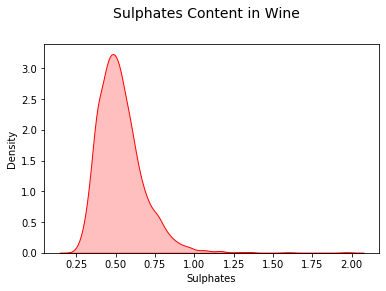

In [39]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='red')